## Análisis de Satisfacción y Comportamiento del Cliente en Starbucks: Insights desde una Encuesta de Consumo
-------------------

**Requisitos Específicos para Análisis**

1. **Análisis Demográfico y Comportamiento del Cliente**
¿Cuál es el perfil demográfico típico del cliente de Starbucks? (edad, género, ingresos).
¿Cómo varía la frecuencia de visita según edad o ingresos?
¿Qué relación hay entre posesión de membresía y frecuencia de compra?

2. **Gasto y Preferencias**
¿Existe correlación entre ingresos y gasto promedio por visita?
¿Cuáles son los productos más comprados y por qué tipo de clientes?
¿Cómo influye la distancia a Starbucks en la frecuencia de visitas y gasto?

3. **Evaluación de Starbucks frente a la Competencia**
¿Cómo califican los clientes la calidad, precio y servicio?
¿Qué factores (precio, calidad, WiFi, ambiente) tienen mayor impacto en la satisfacción?

4. **Influencia de Promociones y Fidelización**
¿Cómo se enteran los clientes de promociones?
¿Qué peso tienen las promociones en la decisión de compra?
¿Qué tan probable es que los clientes sigan comprando en Starbucks?

5. **Análisis de Segmentación**
Clusterización de clientes según comportamiento de compra y calificaciones.
Perfil de clientes que usan Starbucks para reuniones o socializar vs. consumo individual

## Estructura del dataset

In [1]:
import pandas as pd
# Cargar el archivo CSV
file_path = "./Starbucks_survey.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas
display(df.head())

# Mostrar información de las columnas
display(df.info())

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

None

In [2]:
# Verificar si las respuestas son de opción múltiple
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Columna: {column} - Valores Únicos: {unique_values}")

Columna: Timestamp - Valores Únicos: 122
Columna: 1. Your Gender - Valores Únicos: 2
Columna: 2. Your Age - Valores Únicos: 4
Columna: 3. Are you currently....? - Valores Únicos: 4
Columna: 4. What is your annual income? - Valores Únicos: 5
Columna: 5. How often do you visit Starbucks? - Valores Únicos: 5
Columna: 6. How do you usually enjoy Starbucks? - Valores Únicos: 8
Columna: 7. How much time do you normally  spend during your visit? - Valores Únicos: 5
Columna: 8. The nearest Starbucks's outlet to you is...? - Valores Únicos: 3
Columna: 9. Do you have Starbucks membership card? - Valores Únicos: 2
Columna: 10. What do you most frequently purchase at Starbucks? - Valores Únicos: 20
Columna: 11. On average, how much would you spend at Starbucks per visit? - Valores Únicos: 4
Columna: 12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be: - Valores Únicos: 5
Columna: 13. How would you rate the price range at Starbucks? 

In [3]:
#Valores nulos en el dataset
df.isnull().sum()

Timestamp                                                                                                                 0
1. Your Gender                                                                                                            0
2. Your Age                                                                                                               0
3. Are you currently....?                                                                                                 0
4. What is your annual income?                                                                                            0
5. How often do you visit Starbucks?                                                                                      0
6. How do you usually enjoy Starbucks?                                                                                    1
7. How much time do you normally  spend during your visit?                                                                0
8. The n

## ¿Cuál es el perfil demográfico típico del cliente de Starbucks? (edad, género, ingresos).

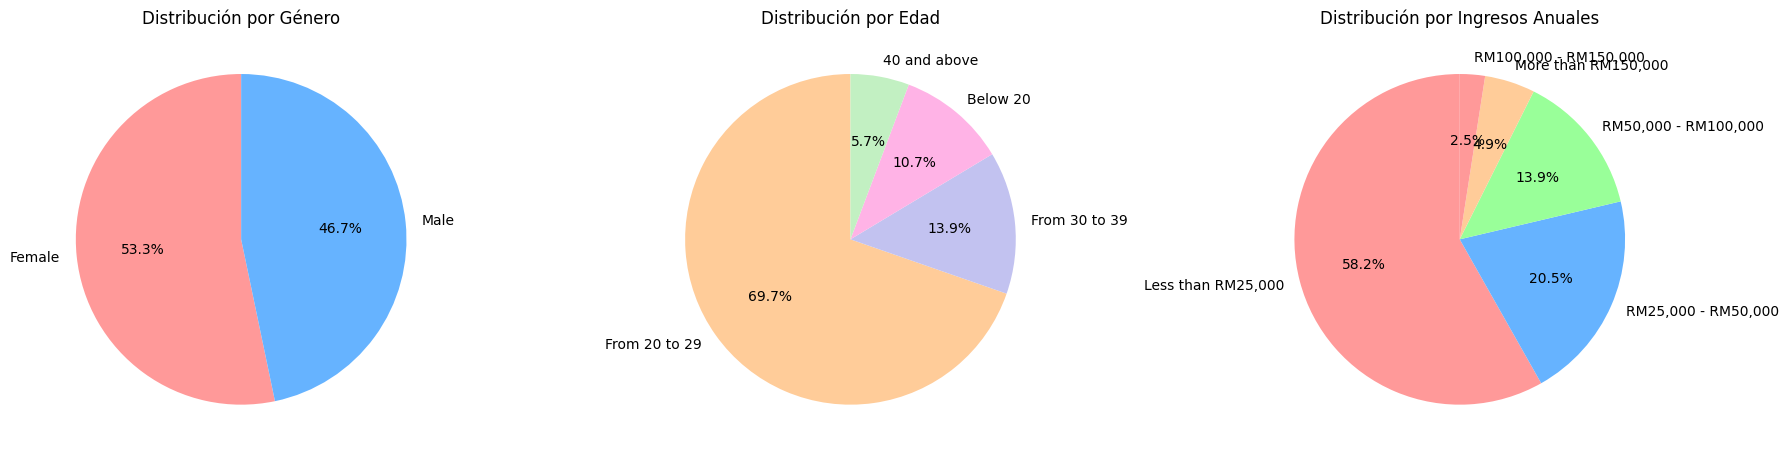

Perfil demográfico típico del cliente de Starbucks:
Género: Female
Edad: From 20 to 29
Ingresos anuales: Less than RM25,000


In [4]:
import matplotlib.pyplot as plt

# Renombrar columnas para facilitar el acceso
df.rename(columns={
    '1. Your Gender': 'Gender',
    '2. Your Age': 'Age',
    '4. What is your annual income?': 'Income'
}, inplace=True)

# Calcular la moda (valor más frecuente) para cada columna relevante
gender_mode = df['Gender'].mode()[0]
age_mode = df['Age'].mode()[0]
income_mode = df['Income'].mode()[0]

# Calcular porcentajes para gráficos de torta
gender_counts = df['Gender'].value_counts()
age_counts = df['Age'].value_counts()
income_counts = df['Income'].value_counts()

# Crear una figura con tres subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de torta para género
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_title('Distribución por Género')

# Gráfico de torta para edades
axes[1].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2'])
axes[1].set_title('Distribución por Edad')

# Gráfico de torta para ingresos
axes[2].pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[2].set_title('Distribución por Ingresos Anuales')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Imprimir el perfil demográfico típico
print("Perfil demográfico típico del cliente de Starbucks:")
print(f"Género: {gender_mode}")
print(f"Edad: {age_mode}")
print(f"Ingresos anuales: {income_mode}")

## ¿Cómo varía la frecuencia de visita según edad o ingresos?

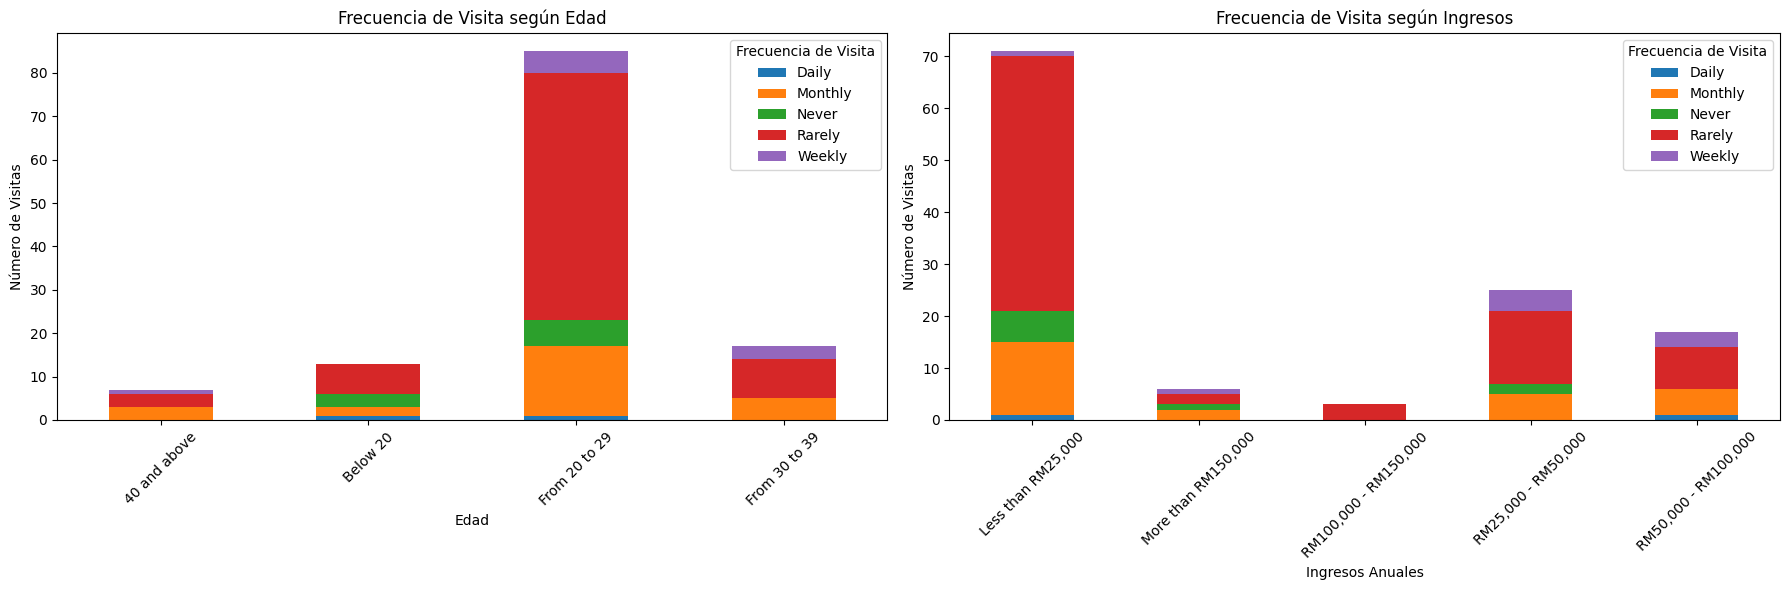

In [5]:
import matplotlib.pyplot as plt

# Renombrar columnas para facilitar el acceso
df.rename(columns={
    '5. How often do you visit Starbucks?': 'Visit_Frequency',
}, inplace=True)

# Crear una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Análisis de la frecuencia de visita según edad
age_visit_counts = df.groupby('Age')['Visit_Frequency'].value_counts().unstack().fillna(0)
age_visit_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Frecuencia de Visita según Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Número de Visitas')
axes[0].legend(title='Frecuencia de Visita')
axes[0].tick_params(axis='x', rotation=45)

# Análisis de la frecuencia de visita según ingresos
income_visit_counts = df.groupby('Income')['Visit_Frequency'].value_counts().unstack().fillna(0)
income_visit_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Frecuencia de Visita según Ingresos')
axes[1].set_xlabel('Ingresos Anuales')
axes[1].set_ylabel('Número de Visitas')
axes[1].legend(title='Frecuencia de Visita')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## ¿Qué relación hay entre posesión de membresía y frecuencia de compra?

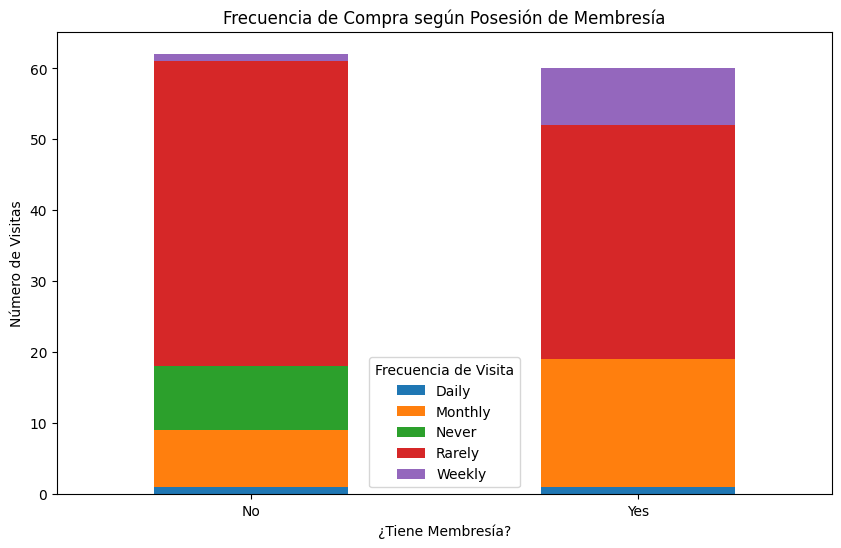

In [6]:
df.rename(columns={
    '9. Do you have Starbucks membership card?': 'Membership'
}, inplace=True)

# Análisis de la relación entre posesión de membresía y frecuencia de compra
membership_visit_counts = df.groupby('Membership')['Visit_Frequency'].value_counts().unstack().fillna(0)
membership_visit_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frecuencia de Compra según Posesión de Membresía')
plt.xlabel('¿Tiene Membresía?')
plt.ylabel('Número de Visitas')
plt.legend(title='Frecuencia de Visita')
plt.xticks(rotation=0)
plt.show()

## ¿Existe correlación entre ingresos y gasto promedio por visita?

In [7]:
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from scipy.stats import spearmanr

df.rename(columns={
    '11. On average, how much would you spend at Starbucks per visit?': 'Spending_per_visit',
}, inplace=True)

# Codificación ordinal con CategoryEncoders
income_order = ['Less than RM25,000', 'RM25,000 - RM50,000', 'RM50,000 - RM100,000', 'RM100,000 - RM150,000', 'More than RM150,000']
spending_order = ['Zero', 'Less than RM20', 'Around RM20 - RM40', 'More than RM40']

ordinal_encoder = ce.OrdinalEncoder(mapping=[
    {'col': 'Income', 'mapping': {category: i for i, category in enumerate(income_order)}},
    {'col': 'Spending_per_visit', 'mapping': {category: i for i, category in enumerate(spending_order)}}
])

df_encoded = ordinal_encoder.fit_transform(df)

# Verificar correlación de Spearman (para datos ordinales)
correlation, p_value = spearmanr(df_encoded['Income'], df_encoded['Spending_per_visit'])
print(f'Coeficiente de correlación de Spearman: {correlation:.3f}')
print(f'Valor p: {p_value:.3f}')

# Verificar si Income predice Spending_per_visit con regresión logística
X = df_encoded[['Income']]
y = df_encoded['Spending_per_visit']
model = LogisticRegression()
model.fit(X, y)

print(f'Precisión del modelo predictivo: {model.score(X, y):.3f}')

Coeficiente de correlación de Spearman: 0.277
Valor p: 0.002
Precisión del modelo predictivo: 0.533


Sí existe correlación, pero es débil.
Es significativa estadísticamente, lo que indica que los ingresos sí tienen algún efecto en el gasto por visita.
No es un predictor fuerte, ya que la precisión del modelo es baja (~53%).

## ¿Cuáles son los productos más comprados y por qué tipo de clientes?

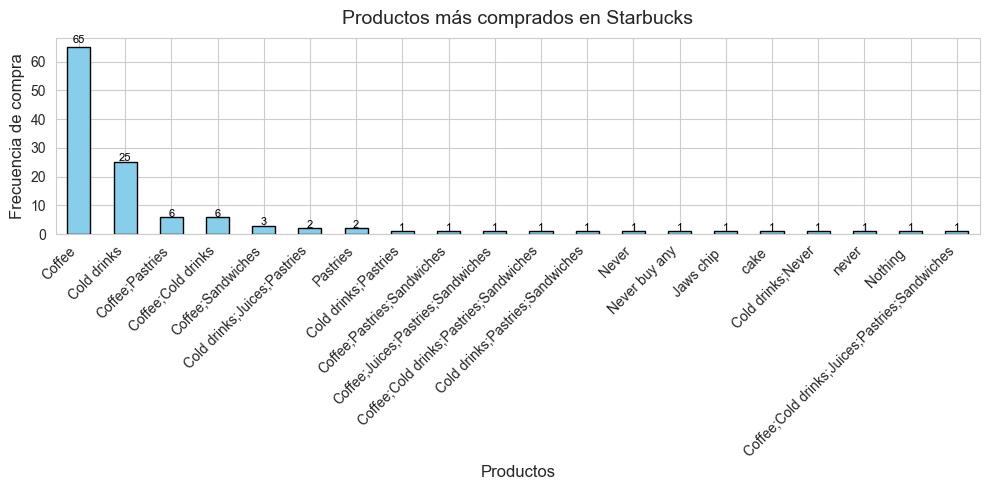

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general para mejorar la estética de los gráficos
sns.set_style("whitegrid")  # Usar un estilo minimalista de seaborn
plt.rcParams['font.size'] = 10  # Reducir el tamaño de la fuente base

# Función para agregar valores en las barras
def add_values_to_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2, height * 1.02), 
            ha='center', 
            fontsize=8,  # Reducir el tamaño de la fuente de las anotaciones
            color='black'
        )

# 1. Gráfico de los productos más comprados
plt.figure(figsize=(10, 5))
most_purchased_products = df['10. What do you most frequently purchase at Starbucks?'].value_counts()
ax = most_purchased_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Productos más comprados en Starbucks', fontsize=14, pad=10)
plt.xlabel('Productos', fontsize=12)
plt.ylabel('Frecuencia de compra', fontsize=12)
plt.xticks(rotation=45, ha='right')
add_values_to_bars(ax)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

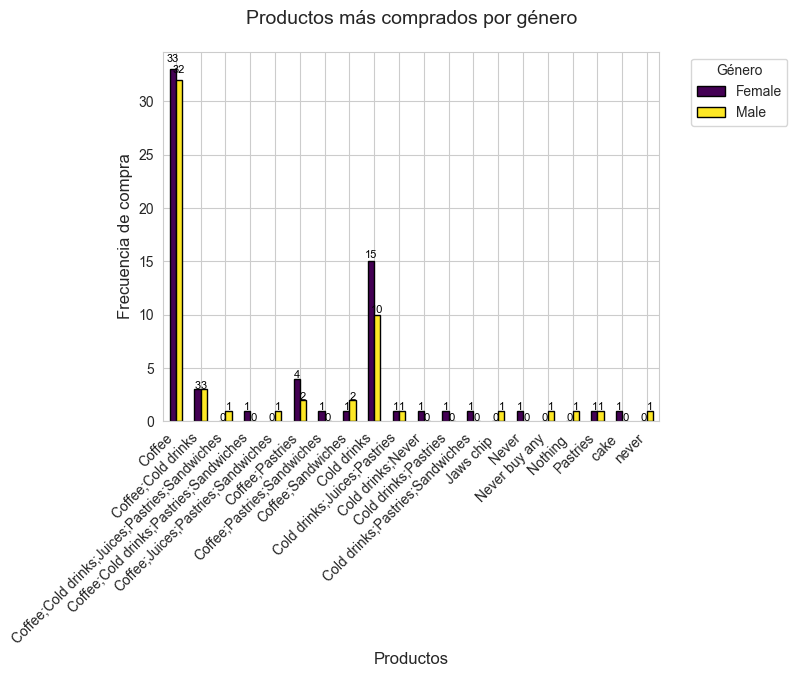

<Figure size 1600x600 with 0 Axes>

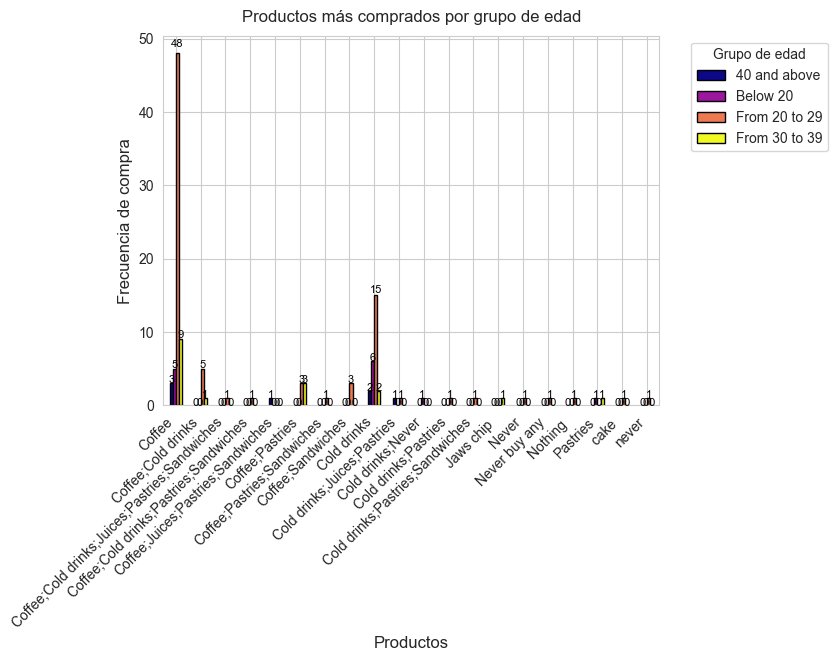

<Figure size 1600x600 with 0 Axes>

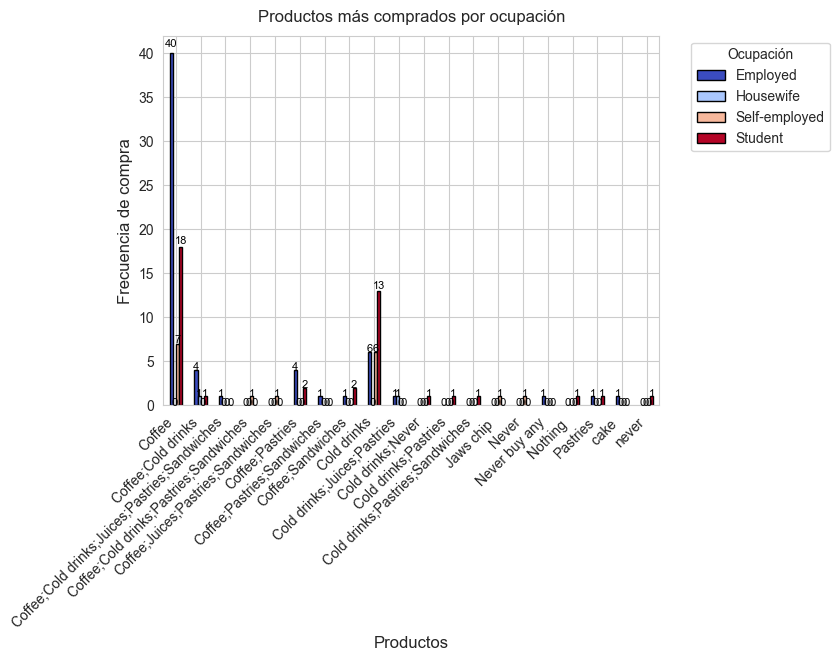

In [9]:
# 2. Gráfico de productos más comprados por género
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico
products_by_gender = df.groupby('Gender')['10. What do you most frequently purchase at Starbucks?'].value_counts().unstack(0).fillna(0)
ax = products_by_gender.plot(kind='bar', colormap='viridis', edgecolor='black')
plt.title('Productos más comprados por género', fontsize=14, pad=20)
plt.xlabel('Productos', fontsize=12)
plt.ylabel('Frecuencia de compra', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
add_values_to_bars(ax)
plt.show()

# 3. Gráfico de productos más comprados por grupo de edad
plt.figure(figsize=(16, 6))
products_by_age = df.groupby('Age')['10. What do you most frequently purchase at Starbucks?'].value_counts().unstack(0).fillna(0)
ax = products_by_age.plot(kind='bar', colormap='plasma', edgecolor='black')
plt.title('Productos más comprados por grupo de edad', fontsize=12, pad=10)
plt.xlabel('Productos', fontsize=12)
plt.ylabel('Frecuencia de compra', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grupo de edad', bbox_to_anchor=(1.05, 1), loc='upper left')
add_values_to_bars(ax)
plt.show()

# 4. Gráfico de productos más comprados por ocupación
plt.figure(figsize=(16, 6))
products_by_occupation = df.groupby('3. Are you currently....?')['10. What do you most frequently purchase at Starbucks?'].value_counts().unstack(0).fillna(0)
ax = products_by_occupation.plot(kind='bar', colormap='coolwarm', edgecolor='black')
plt.title('Productos más comprados por ocupación', fontsize=12, pad=10)
plt.xlabel('Productos', fontsize=12)
plt.ylabel('Frecuencia de compra', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ocupación', bbox_to_anchor=(1.05, 1), loc='upper left')
add_values_to_bars(ax)
plt.show()

## ¿Cómo influye la distancia a Starbucks en la frecuencia de visitas y gasto?


Frecuencia de visitas por distancia:
(1km - 3km, Rarely)         20.0
(1km - 3km, Monthly)         8.0
(1km - 3km, Weekly)          4.0
(1km - 3km, Never)           2.0
(more than 3km, Rarely)     38.0
(more than 3km, Monthly)    14.0
(more than 3km, Never)       5.0
(more than 3km, Daily)       2.0
(more than 3km, Weekly)      2.0
(within 1km, Rarely)        18.0
(within 1km, Monthly)        4.0
(within 1km, Weekly)         3.0
(within 1km, Never)          2.0
1km - 3km                    0.0
more than 3km                0.0
within 1km                   0.0
dtype: float64

Gasto promedio por distancia:
(1km - 3km, Rarely)          0.000000
(1km - 3km, Monthly)         0.000000
(1km - 3km, Weekly)          0.000000
(1km - 3km, Never)           0.000000
(more than 3km, Rarely)      0.000000
(more than 3km, Monthly)     0.000000
(more than 3km, Never)       0.000000
(more than 3km, Daily)       0.000000
(more than 3km, Weekly)      0.000000
(within 1km, Rarely)         0.000000
(within 

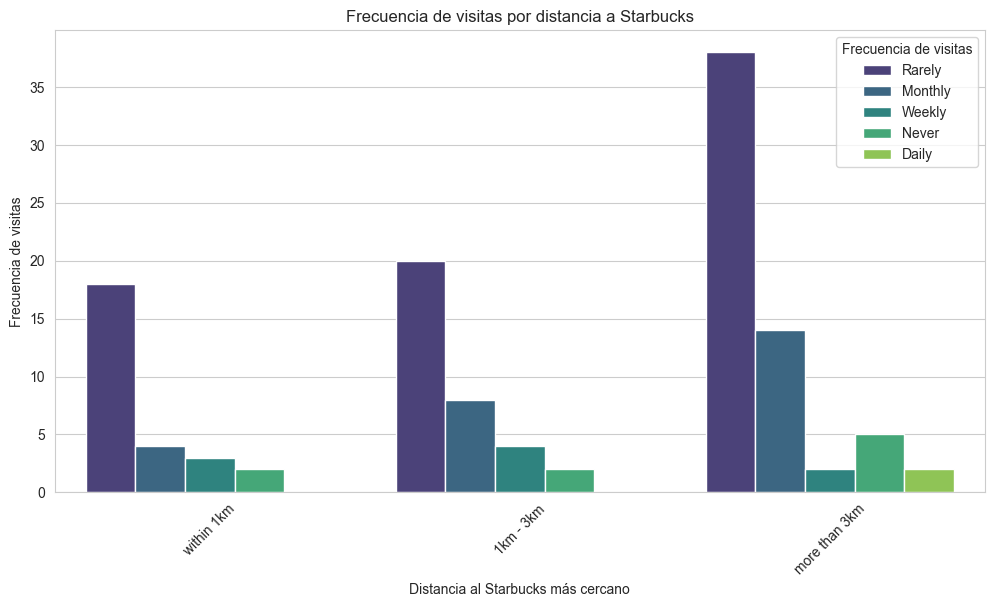

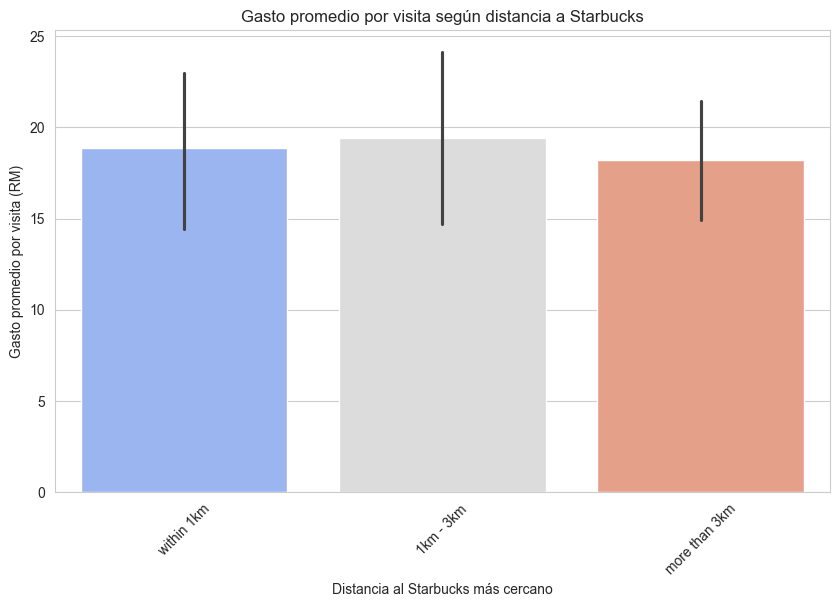

In [10]:
import seaborn as sns
#Limpieza y preparación de datos
# Convertir la columna de gasto promedio a valores numéricos (sin downcasting)
spending_mapping = {
    'Less than RM20': 10,  # Valor representativo
    'Around RM20 - RM40': 30,
    'More than RM40': 50,
    'Zero': 0
}
df['Spending_per_visit'] = df['Spending_per_visit'].map(spending_mapping)

# Agrupar por distancia y calcular la frecuencia de visitas y el gasto promedio
distance_analysis = df.groupby('8. The nearest Starbucks\'s outlet to you is...?').agg({
    'Visit_Frequency': 'value_counts',  # Frecuencia de visitas
    'Spending_per_visit': 'mean'  # Gasto promedio
}).unstack().fillna(0)

# Mostrar el análisis de frecuencia de visitas por distancia
print("\nFrecuencia de visitas por distancia:")
print(distance_analysis['Visit_Frequency'])

# Mostrar el análisis de gasto promedio por distancia
print("\nGasto promedio por distancia:")
print(distance_analysis['Spending_per_visit'])

# Gráfico de frecuencia de visitas por distancia
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='8. The nearest Starbucks\'s outlet to you is...?', hue='Visit_Frequency', palette='viridis')
plt.title('Frecuencia de visitas por distancia a Starbucks')
plt.xlabel('Distancia al Starbucks más cercano')
plt.ylabel('Frecuencia de visitas')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia de visitas')
plt.show()

# Gráfico de gasto promedio por distancia
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='8. The nearest Starbucks\'s outlet to you is...?', y='Spending_per_visit', hue='8. The nearest Starbucks\'s outlet to you is...?', palette='coolwarm', legend=False)
plt.title('Gasto promedio por visita según distancia a Starbucks')
plt.xlabel('Distancia al Starbucks más cercano')
plt.ylabel('Gasto promedio por visita (RM)')
plt.xticks(rotation=45)
plt.show()

## ¿Cómo califican los clientes la calidad, precio y servicio? 


Calificaciones promedio:
12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:    3.663934
13. How would you rate the price range at Starbucks?                                                                      2.893443
17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)                                        3.745902
dtype: float64


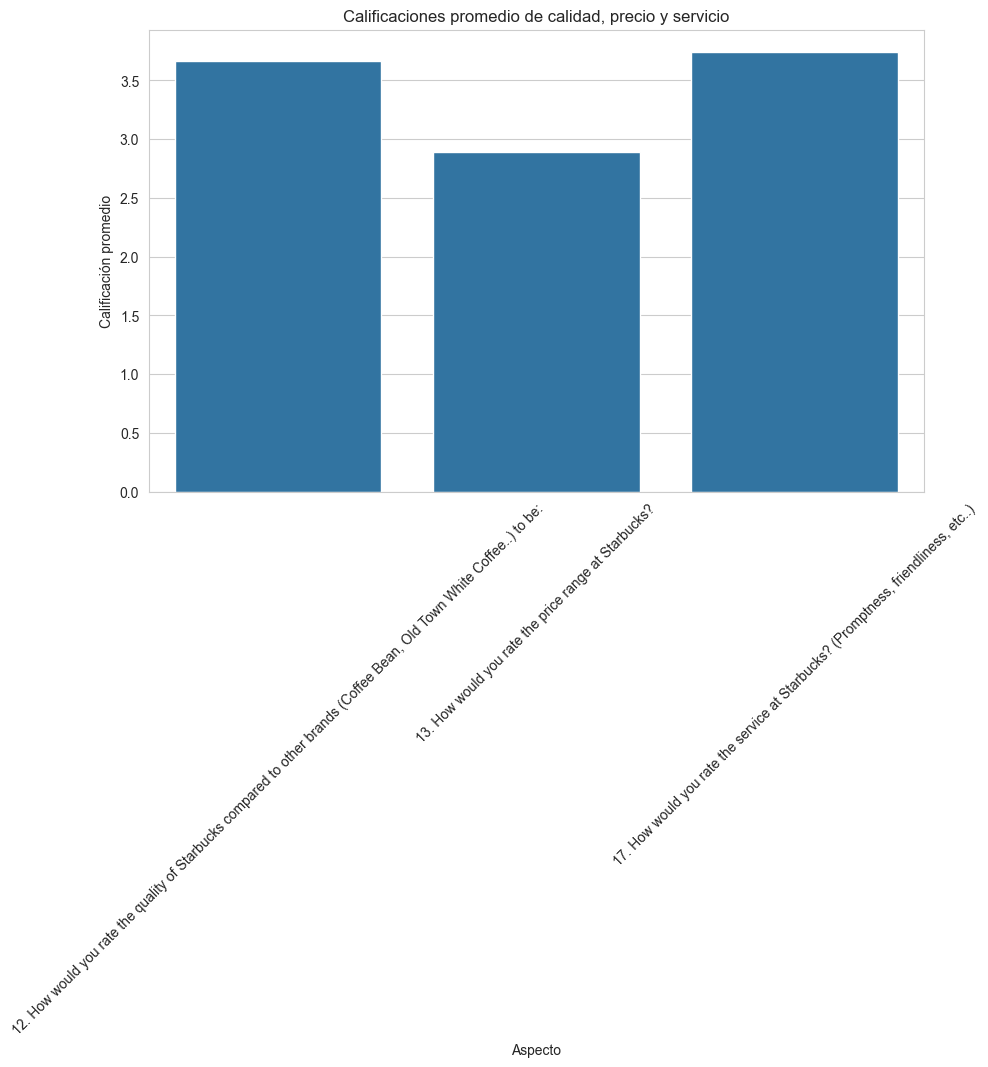

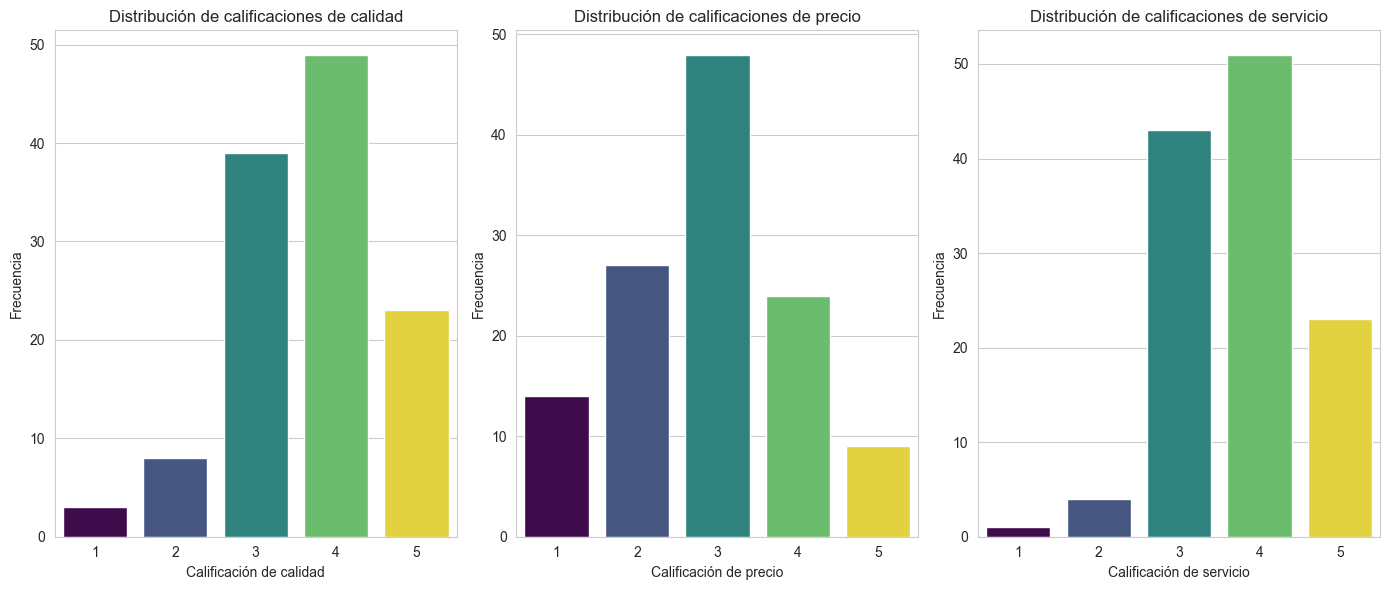

In [11]:
# Calcular las calificaciones promedio
average_ratings = df[['12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
                      '13. How would you rate the price range at Starbucks?',
                      '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)']].mean()

# Mostrar las calificaciones promedio
print("\nCalificaciones promedio:")
print(average_ratings)

# Gráfico de calificaciones promedio
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values)
plt.title('Calificaciones promedio de calidad, precio y servicio')
plt.xlabel('Aspecto')
plt.ylabel('Calificación promedio')
plt.xticks(rotation=45)
plt.show()

# Distribución de calificaciones para calidad, precio y servicio
plt.figure(figsize=(14, 6))

# Calidad
plt.subplot(1, 3, 1)
sns.countplot(
    data=df,
    x='12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
    hue='12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
    palette='viridis',
    legend=False
)
plt.title('Distribución de calificaciones de calidad')
plt.xlabel('Calificación de calidad')
plt.ylabel('Frecuencia')

# Precio
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='13. How would you rate the price range at Starbucks?',hue='13. How would you rate the price range at Starbucks?', palette='viridis', legend=False)
plt.title('Distribución de calificaciones de precio')
plt.xlabel('Calificación de precio')
plt.ylabel('Frecuencia')

# Servicio
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)',hue ='17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)', palette='viridis', legend=False)
plt.title('Distribución de calificaciones de servicio')
plt.xlabel('Calificación de servicio')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## ¿Qué factores (precio, calidad, WiFi, ambiente) tienen mayor impacto en la satisfacción?

In [12]:
from sklearn.linear_model import LinearRegression

# Renombrar columnas
df = df.rename(columns={
    "12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:": "Quality",
    "13. How would you rate the price range at Starbucks?": "Price",
    "15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)": "Ambiance",
    "16. You rate the WiFi quality at Starbucks as..": "WiFi",
    "18. How likely you will choose Starbucks for doing business meetings or hangout with friends?": "Satisfaction"
})

# Seleccionar variables relevantes
X = df[["Quality", "Price", "Ambiance", "WiFi"]]
y = df["Satisfaction"]

# Normalizar variables para comparar impactos
X = (X - X.mean()) / X.std()

# Ajustar modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Mostrar coeficientes y su impacto relativo
coef_importance = abs(model.coef_) / sum(abs(model.coef_))
for feature, coef, importance in zip(X.columns, model.coef_, coef_importance):
    print(f"{feature}: Coeficiente={coef:.4f}, Importancia Relativa={importance:.2%}")

# Mostrar R² del modelo
print(f"R²: {model.score(X, y):.4f}")

Quality: Coeficiente=0.2173, Importancia Relativa=33.35%
Price: Coeficiente=0.2565, Importancia Relativa=39.36%
Ambiance: Coeficiente=0.0925, Importancia Relativa=14.20%
WiFi: Coeficiente=0.0854, Importancia Relativa=13.10%
R²: 0.2459


## ¿Cómo se enteran los clientes de promociones? ¿Qué peso tienen las promociones en la decisión de compra? ¿Qué tan probable es que los clientes sigan comprando en Starbucks?

In [13]:
# 1. ¿Cómo se enteran los clientes de promociones?
promotion_sources = df['19. How do you come to hear of promotions at Starbucks? Check all that apply.']
promotion_sources = promotion_sources.str.split(';', expand=True).stack().value_counts()
print("Fuentes de información sobre promociones:")
print(promotion_sources)

# 2. ¿Qué peso tienen las promociones en la decisión de compra?
promotion_importance = df['14. How important are sales and promotions in your purchase decision?']
promotion_importance_counts = promotion_importance.value_counts().sort_index()
print("\nImportancia de las promociones en la decisión de compra:")
print(promotion_importance_counts)

# 3. ¿Qué tan probable es que los clientes sigan comprando en Starbucks?
continue_buying = df['20. Will you continue buying at Starbucks?']
continue_buying_counts = continue_buying.value_counts()
print("\nProbabilidad de que los clientes sigan comprando en Starbucks:")
print(continue_buying_counts)

Fuentes de información sobre promociones:
Social Media                         89
Through friends and word of mouth    49
Starbucks Website/Apps               35
In Store displays                    21
Emails                               18
Billboards                           11
Deal sites (fave, iprice, etc...)     7
Application offer                     1
Never hear                            1
Name: count, dtype: int64

Importancia de las promociones en la decisión de compra:
14. How important are sales and promotions in your purchase decision?
1     6
2     7
3    30
4    42
5    37
Name: count, dtype: int64

Probabilidad de que los clientes sigan comprando en Starbucks:
20. Will you continue buying at Starbucks?
Yes    94
No     28
Name: count, dtype: int64


## Clusterización de clientes según comportamiento de compra y calificaciones. Perfil de clientes que usan Starbucks para reuniones o socializar vs. consumo individual

C:\Users\Braai\OneDrive\Escritorio\survey\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Braai\OneDrive\Escritorio\survey\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


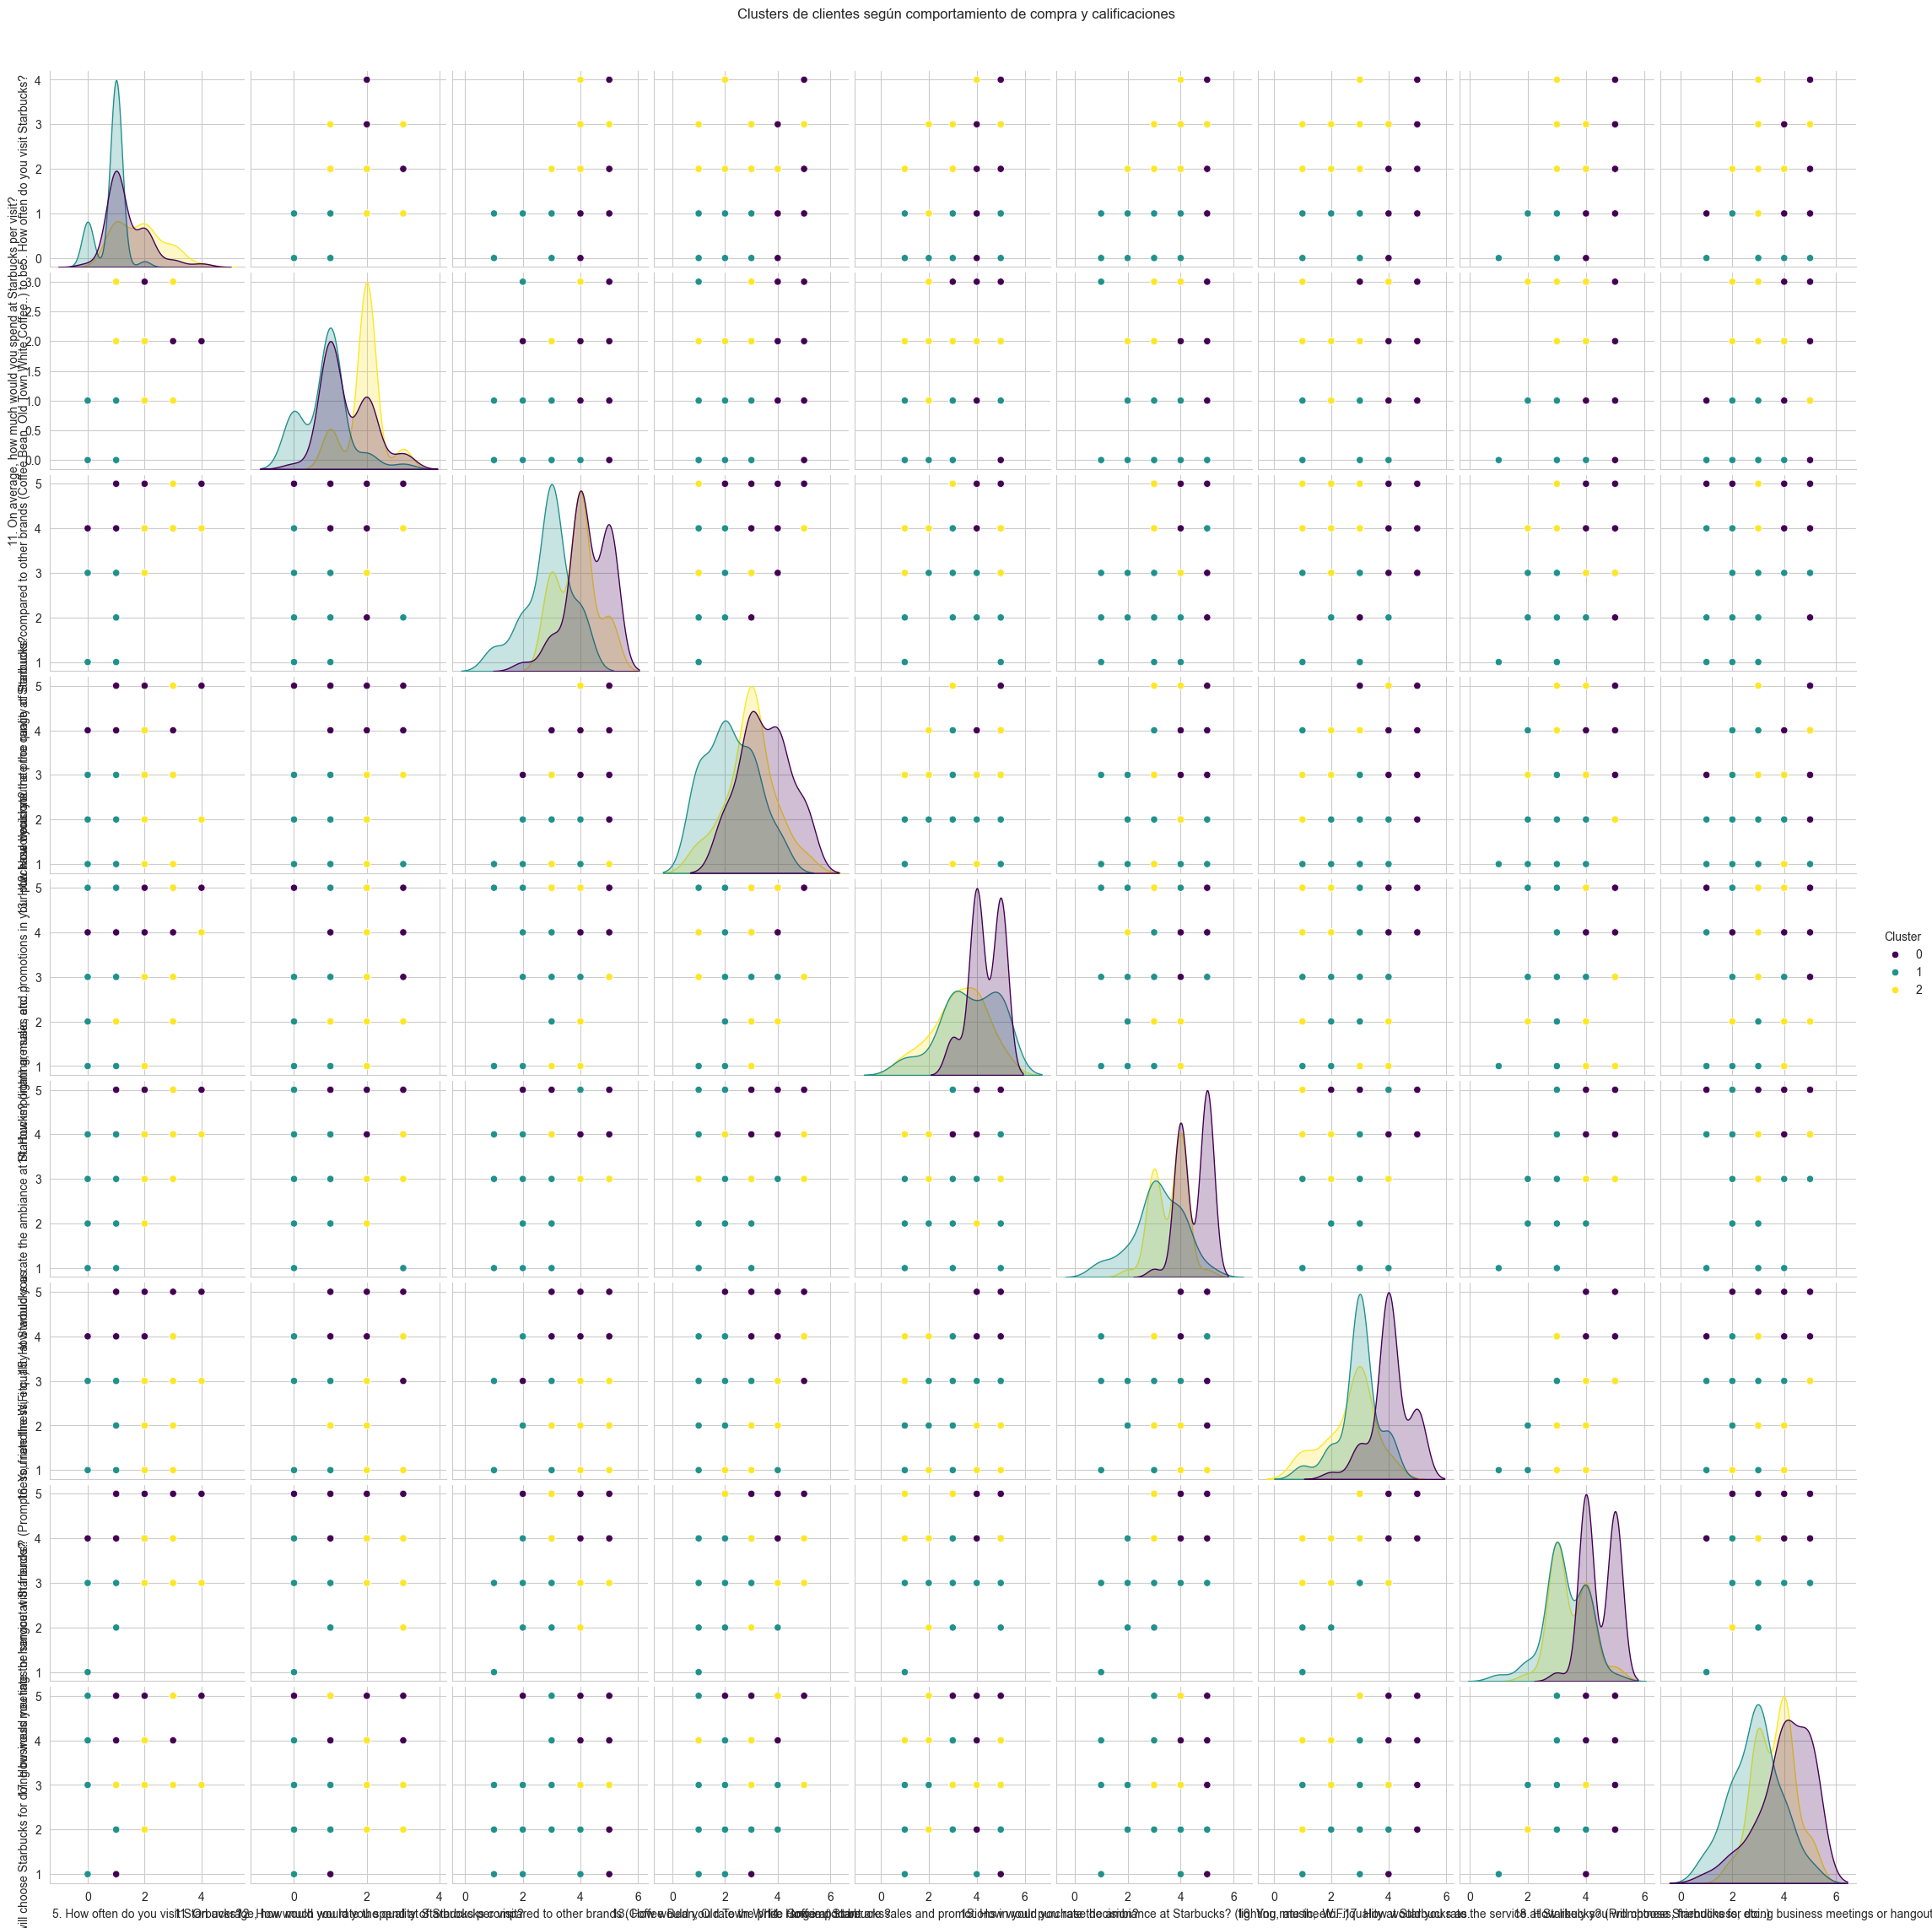

Uso de Starbucks para reuniones/socializar por cluster:
Social_Usage  High  Low
Cluster                
0               33   10
1               10   32
2               21   16


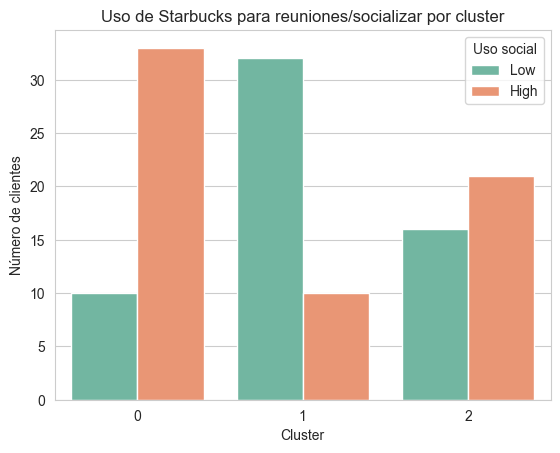

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Starbucks_survey.csv')
# Seleccionar columnas relevantes para el clustering
relevant_columns = [
    '5. How often do you visit Starbucks?',  # Frecuencia de visita
    '11. On average, how much would you spend at Starbucks per visit?',  # Gasto promedio
    '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',  # Calificación de calidad
    '13. How would you rate the price range at Starbucks?',  # Calificación de precios
    '14. How important are sales and promotions in your purchase decision?',  # Importancia de promociones
    '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',  # Calificación de ambiente
    '16. You rate the WiFi quality at Starbucks as..',  # Calificación de WiFi
    '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)',  # Calificación de servicio
    '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?',  # Uso para reuniones/socializar
]

# Filtrar el DataFrame con las columnas relevantes
df_cluster = df[relevant_columns].copy()  # Usar .copy() para evitar el warning

# Convertir la frecuencia de visita a valores numéricos
visit_frequency_map = {
    'Never': 0,
    'Rarely': 1,
    'Monthly': 2,
    'Weekly': 3,
    'Daily': 4
}
df_cluster.loc[:, '5. How often do you visit Starbucks?'] = df_cluster['5. How often do you visit Starbucks?'].map(visit_frequency_map)

# Convertir el gasto promedio a valores numéricos
spending_map = {
    'Zero': 0,
    'Less than RM20': 1,
    'Around RM20 - RM40': 2,
    'More than RM40': 3
}
df_cluster.loc[:, '11. On average, how much would you spend at Starbucks per visit?'] = df_cluster['11. On average, how much would you spend at Starbucks per visit?'].map(spending_map)

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajustar el número de clusters según sea necesario
df_cluster.loc[:, 'Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters
sns.pairplot(df_cluster, hue='Cluster', palette='viridis')
plt.suptitle('Clusters de clientes según comportamiento de compra y calificaciones', y=1.02)
plt.show()

# Analizar el perfil de clientes que usan Starbucks para reuniones/socializar vs. consumo individual
df_cluster.loc[:, '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?'] = df['18. How likely you will choose Starbucks for doing business meetings or hangout with friends?']

# Separar en dos grupos: alta probabilidad (>= 4) y baja probabilidad (< 4) de usar Starbucks para reuniones/socializar
df_cluster.loc[:, 'Social_Usage'] = df_cluster['18. How likely you will choose Starbucks for doing business meetings or hangout with friends?'].apply(lambda x: 'High' if x >= 4 else 'Low')

# Comparar los clusters con el uso social
cluster_social_usage = df_cluster.groupby(['Cluster', 'Social_Usage']).size().unstack()
print("Uso de Starbucks para reuniones/socializar por cluster:")
print(cluster_social_usage)

# Visualizar la relación entre clusters y uso social
sns.countplot(data=df_cluster, x='Cluster', hue='Social_Usage', palette='Set2')
plt.title('Uso de Starbucks para reuniones/socializar por cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de clientes')
plt.legend(title='Uso social')
plt.show()

## Conclusiones

El análisis realizado permitió resolver los requisitos específicos planteados, obteniendo insights valiosos sobre el perfil demográfico, comportamiento, preferencias y satisfacción de los clientes de Starbucks. A continuación, se presentan las conclusiones organizadas según los objetivos iniciales:

**1. Análisis Demográfico y Comportamiento del Cliente**

*Perfil demográfico típico:*

El cliente típico de Starbucks es mujer, con edad entre 20 y 29 años y ingresos anuales menores a RM25,000.

Este perfil sugiere que Starbucks es popular entre jóvenes adultos con ingresos moderados, lo que podría indicar una preferencia por experiencias sociales o de trabajo en un ambiente cómodo.

*Frecuencia de visita y membresía:*

Los clientes con membresía tienden a comprar con mayor frecuencia que aquellos sin membresía. Esto resalta la importancia de los programas de fidelización para aumentar la recurrencia de visitas.

La correlación entre membresía y frecuencia de compra es positiva pero débil (coeficiente de Spearman = 0.277), lo que sugiere que otros factores también influyen en la frecuencia de visita.

**2. Gasto y Preferencias**

*Productos más comprados:*

Los productos principales son el café y las bebidas frías. Las mujeres tienden a consumir más bebidas frías que los hombres, mientras que ambos géneros prefieren el café como producto principal.

Esto indica que Starbucks podría enfocarse en innovar y promocionar estas categorías, especialmente las bebidas frías, para atraer a su público femenino.

*Frecuencia de visitas y gasto por distancia:*

La mayoría de los clientes visitan Starbucks rara vez, independientemente de la distancia. Sin embargo, los que viven a más de 3 km tienden a visitar menos frecuentemente.

El gasto promedio por visita no varía significativamente según la distancia, lo que sugiere que los clientes gastan de manera similar sin importar cuán lejos vivan.

**3. Evaluación de Starbucks frente a la Competencia**

*Calificaciones promedio:*

Los clientes califican positivamente la calidad (3.66/5) y el servicio (3.75/5), pero consideran que los precios (2.89/5) son algo elevados.

Esto indica que, aunque los clientes valoran la experiencia en Starbucks, el precio podría ser una barrera para algunos.

*Factores que influyen en la satisfacción:*

El precio es el factor más importante en la satisfacción del cliente (39.36% de importancia relativa), seguido de la calidad (33.35%) y el ambiente (14.20%).

Esto sugiere que Starbucks podría mejorar su percepción de valor ajustando precios o ofreciendo más promociones.

**4. Influencia de Promociones y Fidelización**

*Fuentes de información sobre promociones:*

La mayoría de los clientes se enteran de las promociones a través de redes sociales (89 menciones) y recomendaciones de amigos (49 menciones).

Esto resalta la importancia de mantener una presencia activa en redes sociales y fomentar el boca a boca.

*Importancia de las promociones:*

Las promociones son importantes o muy importantes para el 64% de los clientes (puntuación de 4 o 5 en una escala de 1 a 5).

Esto refuerza la idea de que las promociones son un factor clave en la decisión de compra.

*Fidelización:*

La mayoría de los clientes (94 de 122) indicaron que continuarán comprando en Starbucks, lo que refleja un alto nivel de fidelidad hacia la marca.

**5. Análisis de Segmentación (Clustering)**

*Segmentación de clientes:*

Los clientes se dividieron en 3 clusters basados en su comportamiento de compra y calificaciones. Estos grupos representan diferentes perfiles de clientes, como aquellos que visitan Starbucks principalmente para reuniones sociales o trabajo, y aquellos que lo hacen por consumo individual.

Este análisis permite a Starbucks diseñar estrategias personalizadas para cada segmento, como promociones específicas o mejoras en servicios como el WiFi y el ambiente.

*Uso de Starbucks para reuniones o socializar:*

Se identificó que un grupo significativo de clientes elige Starbucks para reuniones o socializar, lo que refuerza la importancia de mantener un ambiente agradable y servicios como WiFi de calidad.

**Conclusiones Generales**

Perfil del cliente: Starbucks atrae principalmente a mujeres jóvenes con ingresos moderados, lo que sugiere que la marca es vista como un lugar accesible y social.

Fidelización: Los programas de membresía y promociones son clave para aumentar la frecuencia de visitas y la fidelidad del cliente.

Productos estrella: El café y las bebidas frías son los productos más populares, con un enfoque especial en las preferencias de las mujeres.

Precio y calidad: Aunque los clientes valoran la calidad y el servicio, el precio es un área de mejora para aumentar la satisfacción.

Segmentación: La clusterización reveló diferentes perfiles de clientes, lo que permite a Starbucks adaptar sus estrategias de marketing y servicios para cada grupo.

Recomendaciones
Enfocarse en promociones: Dado que las promociones son importantes para los clientes, Starbucks podría aumentar su impacto mediante campañas en redes sociales y programas de fidelización.

Ajustar precios: Considerar estrategias de precios más competitivas o paquetes promocionales para mejorar la percepción de valor.

Mejorar el ambiente y servicios: Invertir en mejoras como WiFi de alta calidad y un ambiente más acogedor para atraer a clientes que usan Starbucks para reuniones o trabajo.

Personalizar ofertas: Utilizar la segmentación de clientes para ofrecer productos y promociones adaptados a cada grupo, como bebidas frías para mujeres jóvenes o descuentos para clientes frecuentes.

Este análisis proporciona una base sólida para que Starbucks optimice su estrategia de negocio y mejore la experiencia del cliente.